In [401]:
import pandas as pd
import numpy as np

#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.distance import great_circle

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import json # library to handle JSON files

import requests # library to handle requests
from requests import get

from bs4 import BeautifulSoup

import re

from time import sleep

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import seaborn as sns

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [402]:
listing_found = True
page_num = 1
listings = []
while listing_found:
    
            # define header to make the request look like it's comming from an actual browser
        headers = {'User-agent': 'Googlebot'}

            # set url 
        url = 'https://abudhabi.dubizzle.com/en/property-for-rent/residential/?page={}'.format(page_num)

            # load the response
        response = get(url, headers=headers)
        soup = BeautifulSoup(response.text, 'html.parser')

            # find all outer containers of listings
        apartment_containers = soup.find_all('div', class_="ListItem__Root-sc-1i3osc0-1 hMPXKC")
        apartment_containers
        numb=0
        #print('----------------------------'+str(page_num))    
        i=0
        def getter(dictionary,name):
              try:
                        return dictionary.get(name)
              except:
                        return np.nan

        if(page_num==70):
                listing_found= False
                break
        if len(apartment_containers) == 0:
                    listing_found= False
                    break

        for apt in apartment_containers:
                
                aptDictionary= json.loads("".join(apt.find("script", {"type":"application/ld+json"}).contents))
                district = soup.find_all('span', class_="ListItem__Location-sc-1i3osc0-5 jkEDAl")[i].text
                # check if page contains listings
                if len(apartment_containers) == 0:
                    listing_found= False
                    break
                info = aptDictionary.get('name')
                geo=aptDictionary.get('geo')
                
                #latitude=geo.get('latitude')
                latitude=getter(geo,'latitude')
                longitude=getter(geo,'longitude')
                #longitude=geo.get('longitude')
                address=aptDictionary.get('address')
                postal_code=address.get('addressRegion')
                offers=aptDictionary.get('').get('offers')
                
                price=getter(offers,'price')

                rooms=  aptDictionary.get('numberOfRooms')
                
                size=aptDictionary.get('floorSize')

                listings.append([info,postal_code, district, size, rooms, price,latitude,longitude])
                i+=1
        page_num += 1
        
        
column_names = ['Info','PostalCode', 'District', 'Size', 'Rooms', 'Price','Latitude','Longitude']
rental_properties_df = pd.DataFrame(listings, columns=column_names)        
      
      #  print(dataDictionary)

#print(numb)
    # set sleep to mimic a more human behaviour and don't overload the site with requests
sleep(np.random.randint(1,3))
    

In [403]:
rental_properties_df.head(10)

Info PostalCode  \
0  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi   
1  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi   
2   Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   
3  Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi   
4  Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi   
5   Superb 1 Bedroom  Hall 2 Bath room at Al Shamkha  Abu Dhabi   
6  Brand New Villa 7 Bedroom Hall Majlis maidroom...  Abu Dhabi   
7  2 Bed Room Flat Available in a Central A/C Bui...  Abu Dhabi   
8  Amazing 3 Bedroom Apartment Available in a Bui...  Abu Dhabi   
9  Good Offer Very Cheap Price Studio 1600 Al Mus...  Abu Dhabi   

                                   District    Size  Rooms   Price   Latitude  \
0                            Al Reem Island  1850.0    3.0  100000  54.407280   
1        Al Nahyan military Camp, Al Nahyan  2900.0    3.0  135000  54.389681   
2     Al Maha Tower, Tamouh, Al Reem Island   879.0    1.0   58000  54.394754   
3                            Khalifa City A  8600.0    4.0  150000  54.579823   
4          MAG 5 Residences, Al Reem Island  4176.0    4.0  225000  54.415734   
5                                Al Shamkha  1000.0    1.0   30000  54.682974   
6                          Al Shamkha South  6000.0    7.0  150000  54.751063   
7    Al Salam street, Abu Dhabi City Centre  1450.0    2.0   50000  54.373012   
8  Tourist Club Area, Abu Dhabi City Centre  1950.0    3.0   60000  54.383440   
9      Hadbat Al Zafranah, Abu Dhabi Island    44.0    NaN   18000  54.413083   

   Longitude  
0  24.492951  
1  24.466668  
2  24.492069  
3  24.415625  
4  24.489314  
5  24.347722  
6  24.360027  
7  24.496363  
8  24.495191  
9  24.435380

In [404]:
print('There are {} apartments in the dataset'.format(rental_properties_df.shape[0]))

There are 1170 apartments in the dataset


In [405]:
rental_properties_df[rental_properties_df['PostalCode']!='Abu Dhabi']

Empty DataFrame
Columns: [Info, PostalCode, District, Size, Rooms, Price, Latitude, Longitude]
Index: []

In [406]:
rental_properties_df_new = rental_properties_df[rental_properties_df['Latitude'].notnull()]
rental_properties_df_new.head()

Info PostalCode  \
0  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi   
1  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi   
2   Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   
3  Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi   
4  Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi   

                                District    Size  Rooms   Price   Latitude  \
0                         Al Reem Island  1850.0    3.0  100000  54.407280   
1     Al Nahyan military Camp, Al Nahyan  2900.0    3.0  135000  54.389681   
2  Al Maha Tower, Tamouh, Al Reem Island   879.0    1.0   58000  54.394754   
3                         Khalifa City A  8600.0    4.0  150000  54.579823   
4       MAG 5 Residences, Al Reem Island  4176.0    4.0  225000  54.415734   

   Longitude  
0  24.492951  
1  24.466668  
2  24.492069  
3  24.415625  
4  24.489314

In [407]:
map_AbuDhabi = folium.Map(location=[24.46667, 54.36667], zoom_start=11)

# add markers to map
for lat, lng, label in zip(rental_properties_df_new['Longitude'], rental_properties_df_new['Latitude'], rental_properties_df_new['Info']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_AbuDhabi)  
    
map_AbuDhabi

#### Calculate the price per feet squared


In [408]:
rental_properties_df_new['Price/sqft'] = (rental_properties_df_new['Price']/rental_properties_df_new['Size']).round(2)
rental_properties_df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Info PostalCode  \
0  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi   
1  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi   
2   Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   
3  Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi   
4  Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi   

                                District    Size  Rooms   Price   Latitude  \
0                         Al Reem Island  1850.0    3.0  100000  54.407280   
1     Al Nahyan military Camp, Al Nahyan  2900.0    3.0  135000  54.389681   
2  Al Maha Tower, Tamouh, Al Reem Island   879.0    1.0   58000  54.394754   
3                         Khalifa City A  8600.0    4.0  150000  54.579823   
4       MAG 5 Residences, Al Reem Island  4176.0    4.0  225000  54.415734   

   Longitude  Price/sqft  
0  24.492951       54.05  
1  24.466668       46.55  
2  24.492069       65.98  
3  24.415625       17.44  
4  24.489314       53.88

In [409]:
rental_properties_df_new.describe()

Size       Rooms          Price     Latitude    Longitude  \
count    1162.000000  924.000000    1163.000000  1163.000000  1163.000000   
mean     3157.196213    2.469697   83574.446260    54.532395    24.443940   
std     12018.801989    1.480151   71787.653578     0.117072     0.074918   
min         1.000000    1.000000   12000.000000    54.314766    24.300987   
25%       700.000000    1.000000   35000.000000    54.407333    24.415625   
50%      1200.000000    2.000000   58000.000000    54.575998    24.446162   
75%      2200.000000    3.000000  115000.000000    54.599825    24.491603   
max    103810.000000   11.000000  950000.000000    55.027570    24.844186   

          Price/sqft  
count    1162.000000  
mean     2546.802513  
std     18511.419906  
min         1.830000  
25%        36.702500  
50%        48.000000  
75%        64.407500  
max    170000.000000

### Check Number of NaN values on each column

In [410]:
 print(rental_properties_df_new["Size"].isna().sum())
 print(rental_properties_df_new["Rooms"].isna().sum())
 print(rental_properties_df_new["Price"].isna().sum())
 print(rental_properties_df_new["District"].isna().sum())


1
239
0
0


#### Remove rows with NA values in all columns except for the number of rooms since there are too many missing values

In [411]:
print('There are {} apartments in the dataset befor '.format(rental_properties_df_new.shape))

There are (1163, 9) apartments in the dataset befor 


In [412]:
rental_properties_df_new.dropna(subset=['PostalCode', 'District', 'Size', 'Price','Rooms'], inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [413]:
print('There are {} apartments in the dataset After Drop '.format(rental_properties_df_new.shape))

There are (923, 9) apartments in the dataset After Drop 


In [414]:
rental_properties_df_new['Rooms'].value_counts()

1.0     318
2.0     198
3.0     193
4.0     135
5.0      50
6.0      17
7.0       7
9.0       4
11.0      1
Name: Rooms, dtype: int64

#### Let's remove all rows with rooms larger than 6. Apartments bigger than 6 will most likely be luxurious apartments and does not fit the target group.

In [415]:
rental_properties_df_new = rental_properties_df_new[rental_properties_df_new['Rooms'] <= 6]


#### Let's remove all rows with size les than  10. 

In [416]:
rental_properties_df_new = rental_properties_df_new[rental_properties_df_new['Size'] >= 100]


#### Let's remove all Districts which has less than 3 apartments 

In [417]:
rental_properties_df_new = rental_properties_df_new[rental_properties_df_new['District'].map(rental_properties_df_new['District'].value_counts()) > 3]
print('There are {} apartments in the dataset After Drop '.format(rental_properties_df_new.shape))

There are (775, 9) apartments in the dataset After Drop 


#### Let's  Enhance Districts Names since I noticed the names are not correct

In [418]:
#data = abuDhabi_districts['District'][1].split(',')
rental_properties_df_new['stdDistrict']=''
for index, row in rental_properties_df_new.iterrows():
   
    data=row['District'].split(',')[-1]
  
    rental_properties_df_new['stdDistrict'][index]=data
    
    
rental_properties_df_new.drop(labels='District', axis=1,inplace=True)


rental_properties_df_new.rename(columns={'stdDistrict':'District'}, inplace=True)
rental_properties_df_new.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Info PostalCode    Size  \
0  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
1  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
2   Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
3  Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi  8600.0   
4  Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi  4176.0   

   Rooms   Price   Latitude  Longitude  Price/sqft         District  
0    3.0  100000  54.407280  24.492951       54.05   Al Reem Island  
1    3.0  135000  54.389681  24.466668       46.55        Al Nahyan  
2    1.0   58000  54.394754  24.492069       65.98   Al Reem Island  
3    4.0  150000  54.579823  24.415625       17.44   Khalifa City A  
4    4.0  225000  54.415734  24.489314       53.88   Al Reem Island

In [419]:
rental_properties_df_new

Info PostalCode    Size  \
0     No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
1     Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
2      Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
3     Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi  8600.0   
4     Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi  4176.0   
5      Superb 1 Bedroom  Hall 2 Bath room at Al Shamkha  Abu Dhabi  1000.0   
8     Amazing 3 Bedroom Apartment Available in a Bui...  Abu Dhabi  1950.0   
15    VERY NICE 2BHK WITH 2 BATHROOMS APARTMENT AVAI...  Abu Dhabi  1200.0   
16    HOT OFFER VERY NICE 1BHK APARTMENT AVAILABLE I...  Abu Dhabi   800.0   
17    HOT OFFER STUDIO WITH FULL BATHROOM JUST 20K A...  Abu Dhabi   400.0   
18    MONTHLY VERY NICE STUDIO APARTMENT IN MBZ CITY...  Abu Dhabi   600.0   
19    VERY NICE 1BHK APARTMENT AVAILABLE IN MBZ CITY...  Abu Dhabi   800.0   
23    Outclass Personal Mulhaq 2bhk For Family with ...  Abu Dhabi  1400.0   
24    Brand New 2 Bedrooms With Hall(Majlis) 3 Bathr...  Abu Dhabi  1600.0   
25    Spacious 1BHK With Huge Kitchen in AL Shawemkh...  Abu Dhabi  1200.0   
26    Lets Take the Stylish 2BHK Opportunity At grou...  Abu Dhabi  1200.0   
27          Superb 4BHK With Balcony in Al Shamkha City  Abu Dhabi  2500.0   
28    Super Deluxe 2 BHK With Store in AL Shamkha Ci...  Abu Dhabi  2500.0   
30     Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
31       Lovely Home, Garden, Terrace, Great Facilities  Abu Dhabi  2700.0   
32    Brand New Single Row Prime TH! Available!!! Ty...  Abu Dhabi  3500.0   
34       Sea view lovely unit with balcony in Al Naseem  Abu Dhabi  1387.0   
36    Huge 1BHK With 2 Bathrooms , Big Kitchen in AL...  Abu Dhabi  1200.0   
38    Brand New 1BHK With private Terrace in Al Sham...  Abu Dhabi  1200.0   
39    Take A Best Deal 1BHK With Terrace in Al Shamk...  Abu Dhabi  1200.0   
40    Brand New 2BHK At Ground Floor in AL Shamkha City  Abu Dhabi  1800.0   
41    Super Deluxe 3BHK With Hall Available For Rent...  Abu Dhabi  2500.0   
43    EXCELLENT 1BHK WITH PRIVATE ROOF  2 WASHROOMS ...  Abu Dhabi  1200.0   
46    NO AGENCY ! NO CHILLER FEE ! 13 MONTH ! 2 BED ...  Abu Dhabi  1311.0   
47    3 BED ROOM ! NO COMMISSION ! NO CHILLER FEES !...  Abu Dhabi  1811.0   
...                                                 ...        ...     ...   
1112  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
1113  Lavish 3 bedroom hall for Aed 5,500 monthly in...  Abu Dhabi  1700.0   
1114  Hot Deal | Elegant and Luxurious Villa 4 beds ...  Abu Dhabi  3735.0   
1115  Ready To Move - Fully Furnished Studio Availab...  Abu Dhabi   650.0   
1117  EXCELLENT FINISHING 1BHK  APARTMENT IS AVAILAB...  Abu Dhabi  1500.0   
1123  No Commission! No Deposit!4BHK Villa near Sher...  Abu Dhabi  2970.0   
1130                       6 BR villa in Khalifa City A  Abu Dhabi  6000.0   
1132  Good Deal! Dazzling 4BR Townhouse in Al Raha G...  Abu Dhabi  3272.0   
1136                 Excellent 2BR+Maids Apt in Al Reem  Abu Dhabi  1248.0   
1137            Big Garden | Single Row | Free Tawtheeq  Abu Dhabi  1990.0   
1138  Excellent Layout 1BR Apt in Al Reem W/ 1 MONTH...  Abu Dhabi   893.0   
1139    Beautiful 1BR Apartment in Al Reem (Prime Area)  Abu Dhabi   861.0   
1140  Grab This Private Entrance Luxury 1 bedroom Se...  Abu Dhabi   850.0   
1141  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
1142  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
1144    Brand new Exceptional 5 BR Villa with Amenities  Abu Dhabi  4500.0   
1145    Beautiful 1BR Apartment in Al Reem (Prime Area)  Abu Dhabi   861.0   
1146  High Class 2BR Apt in Al Raha Beach | Inquire Now  Abu Dhabi  1142.0   
1147  Bright, Cozy And Fresh Apartment | 2BHK w/ a N...  Abu Dhabi  1300.0   
1150  VERY NICE STUDIO APART (SEPERATE KITCHEN INBUI...  Abu Dhabi   850.

In [420]:
rental_properties_df_new['District'].value_counts()

Khalifa City A                      179
 Mohammed Bin Zayed City             94
 Abu Dhabi City Centre               69
 Al Reem Island                      54
 Yas Northern Residential & Golf     53
Al Shamkha                           32
 Abu Dhabi Island                    28
 Al Raha Beach                       24
Al Reem Island                       20
 Khor Al Raha                        18
Khalifa City B                       15
Al Raha Gardens                      15
 Shams Abu Dhabi                     14
 Tourist Club Area                   14
 Yas Island                          14
 Al Reef                             13
Al Rahba                             13
 Al Nahyan                           13
 Al Matar                            12
Al Raha Beach                        11
 Tamouh                              11
 Saadiyat Island                      8
Al Bahia                              8
Al Samha                              7
 Al Ghadeer                           7


#### We can visualize the number of apartments per room number and number of apartments in each district

[Text(0, 0, 'Al Reem Island'),
 Text(0, 0, ' Al Nahyan'),
 Text(0, 0, ' Al Reem Island'),
 Text(0, 0, 'Khalifa City A'),
 Text(0, 0, 'Al Shamkha'),
 Text(0, 0, ' Abu Dhabi City Centre'),
 Text(0, 0, ' Mohammed Bin Zayed City'),
 Text(0, 0, 'Khalifa City B'),
 Text(0, 0, 'Al Shawamekh'),
 Text(0, 0, 'Al Raha Gardens'),
 Text(0, 0, ' Yas Northern Residential & Golf'),
 Text(0, 0, 'Al Raha Beach'),
 Text(0, 0, ' Tamouh'),
 Text(0, 0, ' Abu Dhabi Island'),
 Text(0, 0, ' Shams Abu Dhabi'),
 Text(0, 0, ' Khor Al Raha'),
 Text(0, 0, 'Al Shamkha South'),
 Text(0, 0, 'Al Falah City'),
 Text(0, 0, ' Al Matar'),
 Text(0, 0, ' Al Raha Beach'),
 Text(0, 0, ' Al Ghadeer'),
 Text(0, 0, ' Al Reef'),
 Text(0, 0, ' Yas Island'),
 Text(0, 0, ' ADAFZA'),
 Text(0, 0, ' Tourist Club Area'),
 Text(0, 0, 'Hydra Village'),
 Text(0, 0, ' Saadiyat Island'),
 Text(0, 0, 'Al Samha'),
 Text(0, 0, 'New Shahama'),
 Text(0, 0, 'Al Rahba'),
 Text(0, 0, 'Al Bahia')]

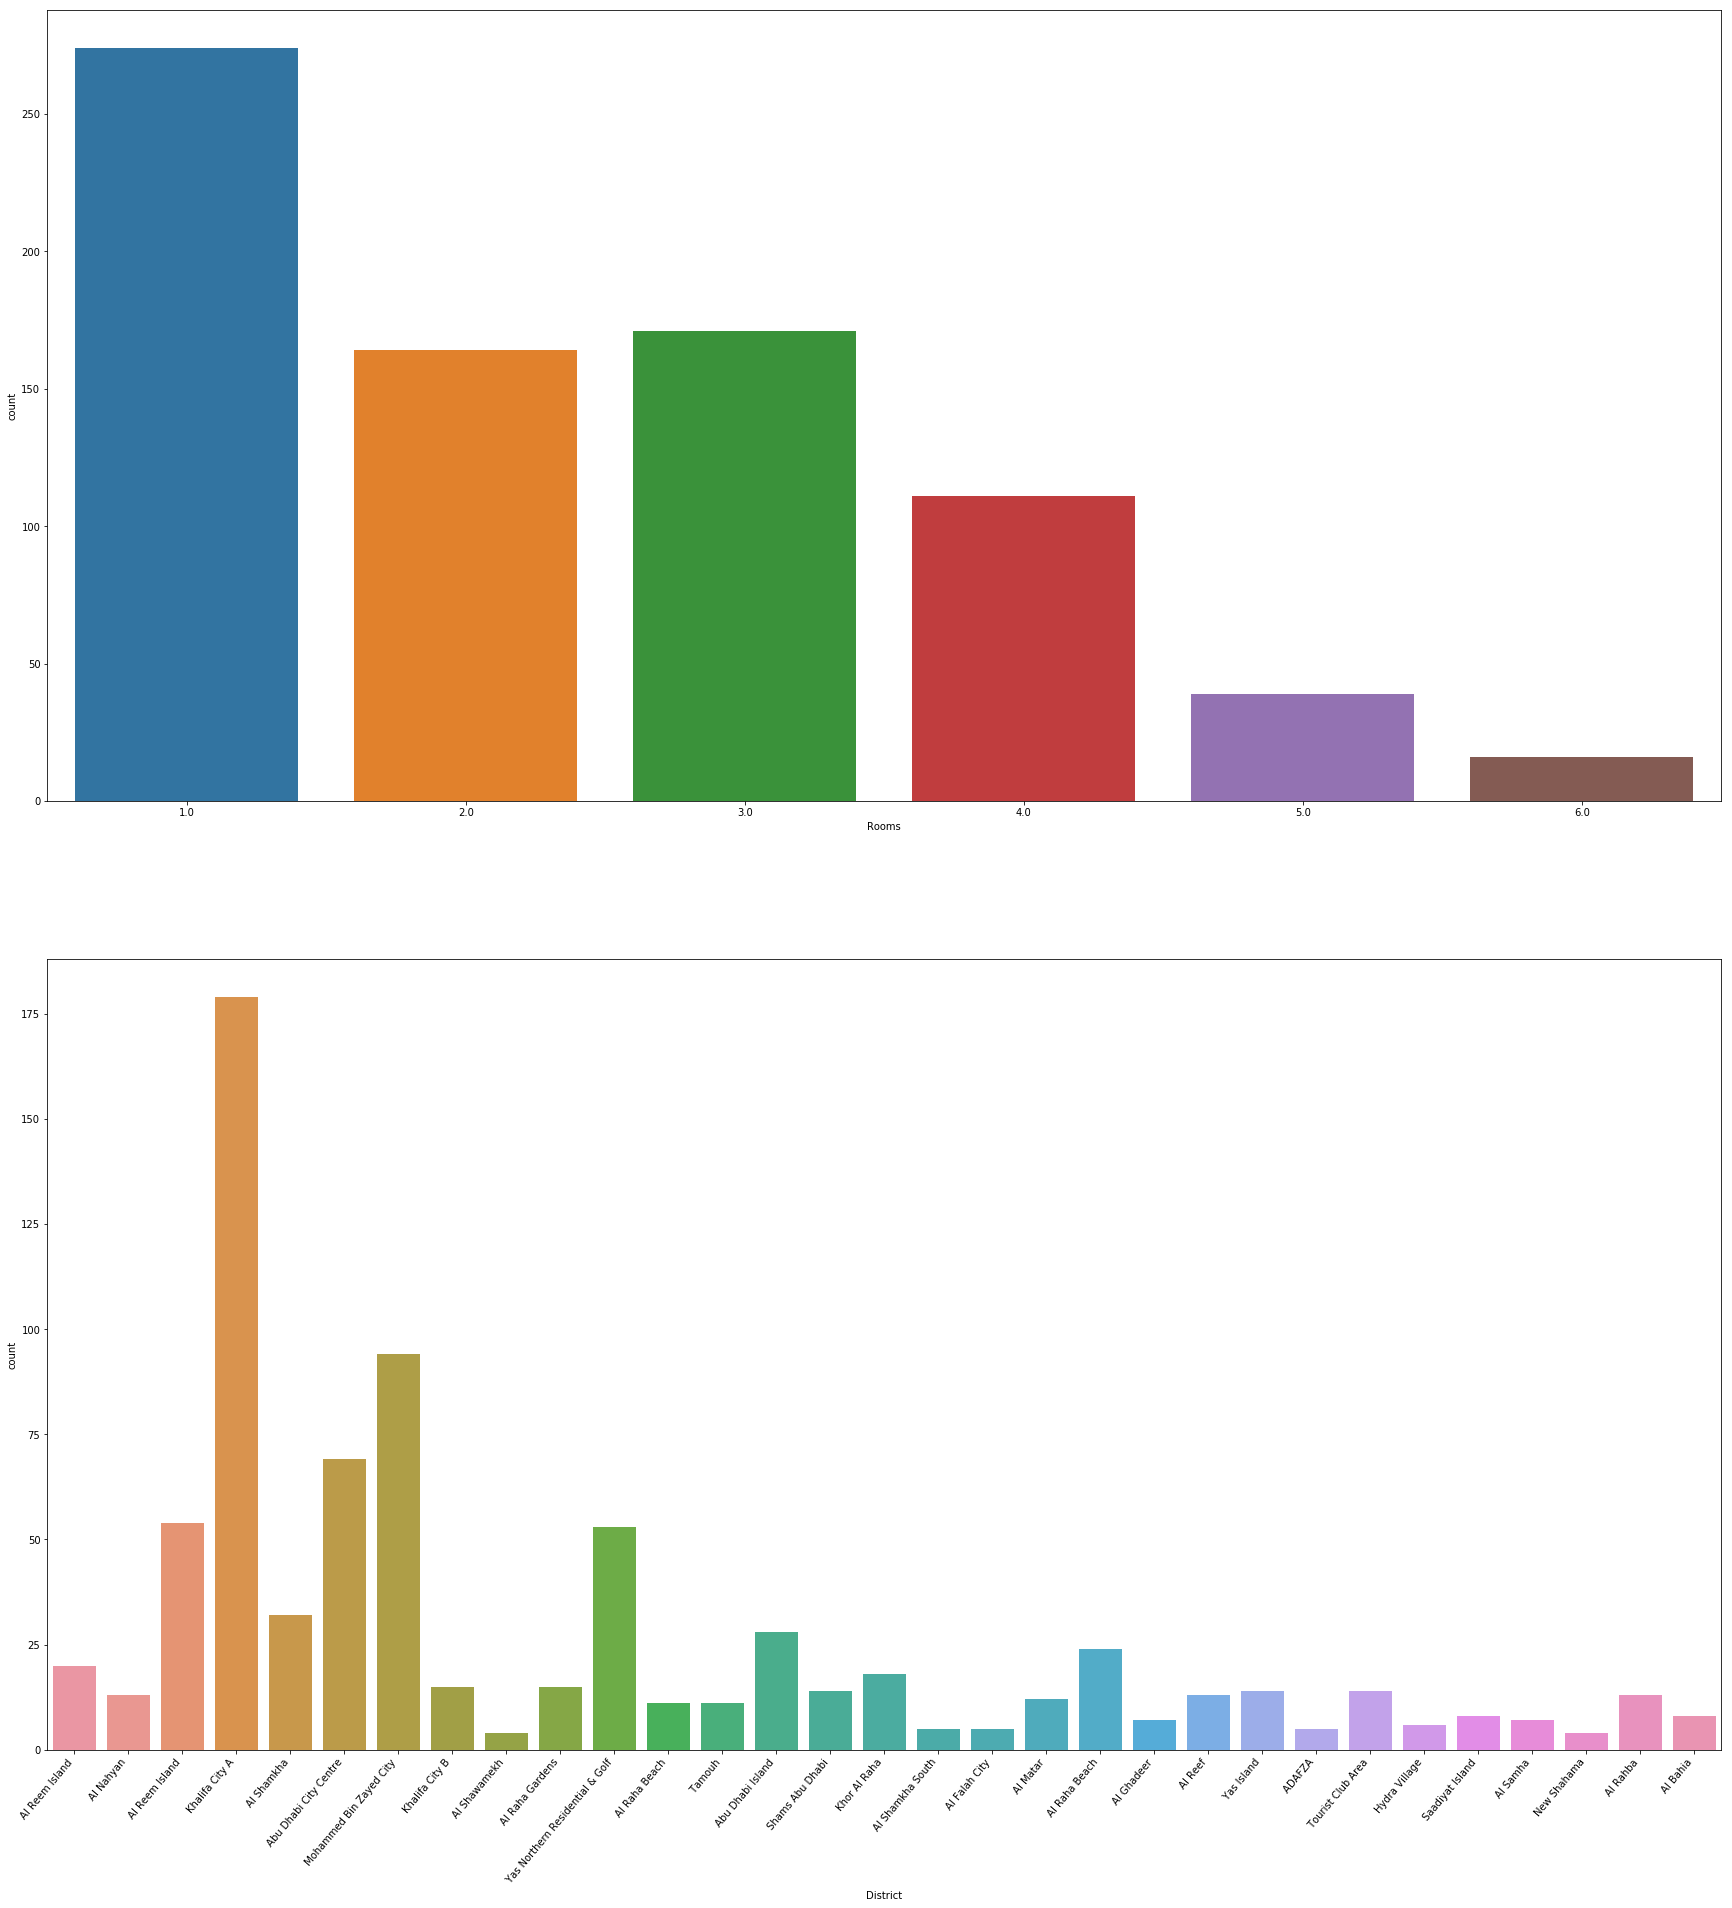

In [421]:
rental_properties_df_new.reset_index(drop=True)
fig, ax =plt.subplots(2,1, figsize=(30,32))
sns.countplot(rental_properties_df_new['Rooms'], ax=ax[0])
sns.countplot(rental_properties_df_new['District'], ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=50, ha="right")

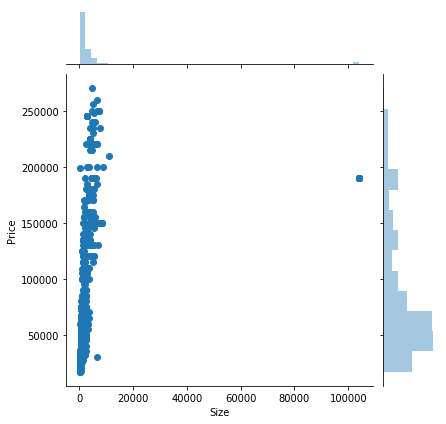

In [422]:
sns.jointplot(x='Size', y='Price', data=rental_properties_df_new[['Size','Price']])

In [423]:

#rental_properties_df_new['Price']=rental_properties_df_new['Price']/100
rental_properties_df_new.head()

Info PostalCode    Size  \
0  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
1  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
2   Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
3  Deluxe Pvt Entrance 4 BR villa with very huge ...  Abu Dhabi  8600.0   
4  Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi  4176.0   

   Rooms   Price   Latitude  Longitude  Price/sqft         District  
0    3.0  100000  54.407280  24.492951       54.05   Al Reem Island  
1    3.0  135000  54.389681  24.466668       46.55        Al Nahyan  
2    1.0   58000  54.394754  24.492069       65.98   Al Reem Island  
3    4.0  150000  54.579823  24.415625       17.44   Khalifa City A  
4    4.0  225000  54.415734  24.489314       53.88   Al Reem Island

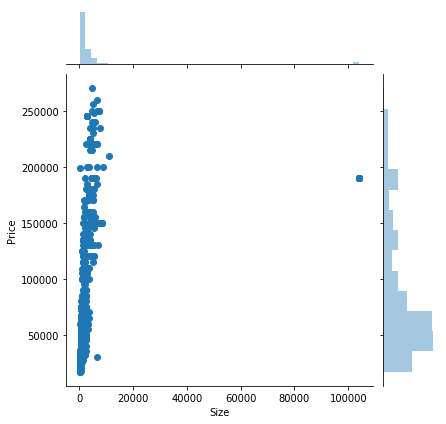

In [424]:
sns.jointplot(x='Size', y='Price', data=rental_properties_df_new[['Size','Price']])

### Enhance The values and remove outliers

In [425]:
rental_properties_df_new = rental_properties_df_new[rental_properties_df_new['Price'] <= 500000]
rental_properties_df_new = rental_properties_df_new[rental_properties_df_new['Size'] <= 8000]

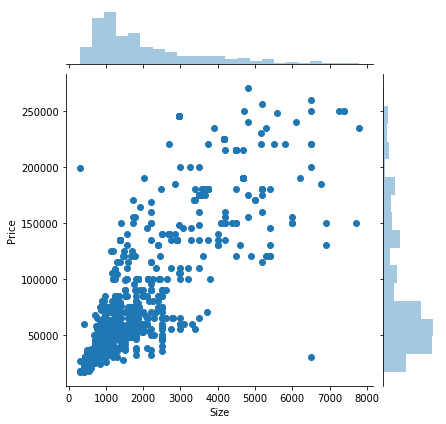

In [426]:
sns.jointplot(x='Size', y='Price', data=rental_properties_df_new[['Size','Price']])

#### We expect the value of properties to go up as the number of rooms increases. The interesting aspect in this boxplot is that 1 and 2 room apartments are competing in the same price range.

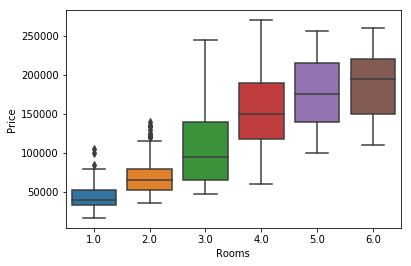

In [427]:
sns.boxplot(x='Rooms', y='Price', data=rental_properties_df_new)

#### In the following plot we can see that the price/sqft is in the same price range for all size apartments besides for single room apartments where the price/sqft goes even higher and for four and five bedrooms is less than the three bedrooms 

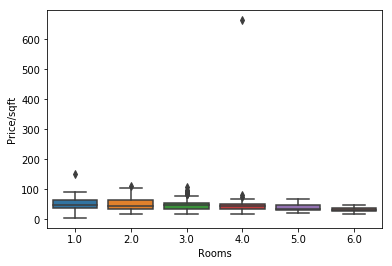

In [428]:
sns.boxplot(x='Rooms', y='Price/sqft', data=rental_properties_df_new)

#### Let's also check the differences in price per sqft in each district

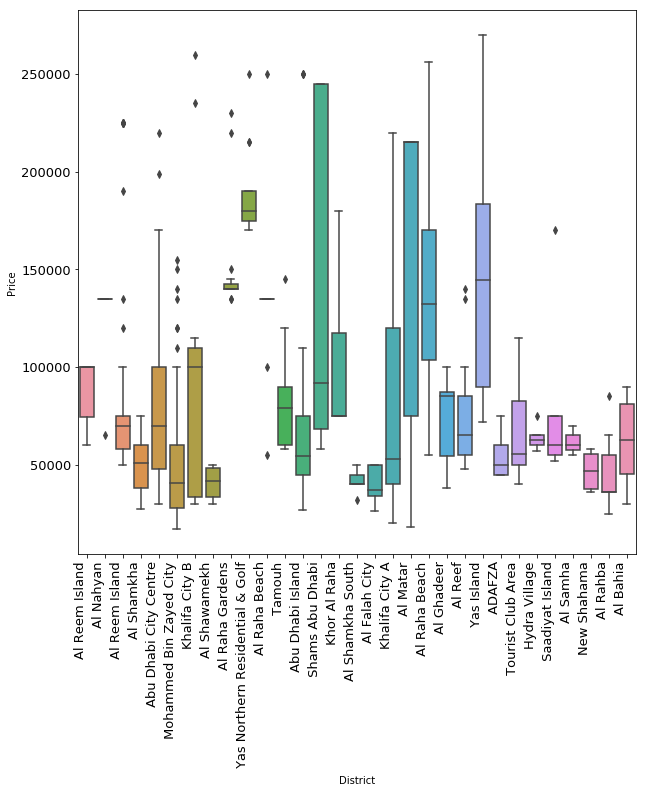

In [429]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x='District', y='Price', data=rental_properties_df_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(labelsize=13)

In [430]:
rental_properties_df_new.reset_index(drop=True)

Info PostalCode    Size  \
0    No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
1    Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
2     Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
3    Luxurious Living 4 BR Penthouse In Al Reem Island  Abu Dhabi  4176.0   
4     Superb 1 Bedroom  Hall 2 Bath room at Al Shamkha  Abu Dhabi  1000.0   
5    Amazing 3 Bedroom Apartment Available in a Bui...  Abu Dhabi  1950.0   
6    VERY NICE 2BHK WITH 2 BATHROOMS APARTMENT AVAI...  Abu Dhabi  1200.0   
7    HOT OFFER VERY NICE 1BHK APARTMENT AVAILABLE I...  Abu Dhabi   800.0   
8    HOT OFFER STUDIO WITH FULL BATHROOM JUST 20K A...  Abu Dhabi   400.0   
9    MONTHLY VERY NICE STUDIO APARTMENT IN MBZ CITY...  Abu Dhabi   600.0   
10   VERY NICE 1BHK APARTMENT AVAILABLE IN MBZ CITY...  Abu Dhabi   800.0   
11   Outclass Personal Mulhaq 2bhk For Family with ...  Abu Dhabi  1400.0   
12   Brand New 2 Bedrooms With Hall(Majlis) 3 Bathr...  Abu Dhabi  1600.0   
13   Spacious 1BHK With Huge Kitchen in AL Shawemkh...  Abu Dhabi  1200.0   
14   Lets Take the Stylish 2BHK Opportunity At grou...  Abu Dhabi  1200.0   
15         Superb 4BHK With Balcony in Al Shamkha City  Abu Dhabi  2500.0   
16   Super Deluxe 2 BHK With Store in AL Shamkha Ci...  Abu Dhabi  2500.0   
17    Cheapest price in the market! Luxurious Apt unit  Abu Dhabi   879.0   
18      Lovely Home, Garden, Terrace, Great Facilities  Abu Dhabi  2700.0   
19   Brand New Single Row Prime TH! Available!!! Ty...  Abu Dhabi  3500.0   
20      Sea view lovely unit with balcony in Al Naseem  Abu Dhabi  1387.0   
21   Huge 1BHK With 2 Bathrooms , Big Kitchen in AL...  Abu Dhabi  1200.0   
22   Brand New 1BHK With private Terrace in Al Sham...  Abu Dhabi  1200.0   
23   Take A Best Deal 1BHK With Terrace in Al Shamk...  Abu Dhabi  1200.0   
24   Brand New 2BHK At Ground Floor in AL Shamkha City  Abu Dhabi  1800.0   
25   Super Deluxe 3BHK With Hall Available For Rent...  Abu Dhabi  2500.0   
26   EXCELLENT 1BHK WITH PRIVATE ROOF  2 WASHROOMS ...  Abu Dhabi  1200.0   
27   NO AGENCY ! NO CHILLER FEE ! 13 MONTH ! 2 BED ...  Abu Dhabi  1311.0   
28   3 BED ROOM ! NO COMMISSION ! NO CHILLER FEES !...  Abu Dhabi  1811.0   
29   12 cheque ! MODERN FURNISHED ! 2 BED ROOM WITH...  Abu Dhabi  1327.0   
..                                                 ...        ...     ...   
724  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
725  Lavish 3 bedroom hall for Aed 5,500 monthly in...  Abu Dhabi  1700.0   
726  Hot Deal | Elegant and Luxurious Villa 4 beds ...  Abu Dhabi  3735.0   
727  Ready To Move - Fully Furnished Studio Availab...  Abu Dhabi   650.0   
728  EXCELLENT FINISHING 1BHK  APARTMENT IS AVAILAB...  Abu Dhabi  1500.0   
729  No Commission! No Deposit!4BHK Villa near Sher...  Abu Dhabi  2970.0   
730                       6 BR villa in Khalifa City A  Abu Dhabi  6000.0   
731  Good Deal! Dazzling 4BR Townhouse in Al Raha G...  Abu Dhabi  3272.0   
732                 Excellent 2BR+Maids Apt in Al Reem  Abu Dhabi  1248.0   
733            Big Garden | Single Row | Free Tawtheeq  Abu Dhabi  1990.0   
734  Excellent Layout 1BR Apt in Al Reem W/ 1 MONTH...  Abu Dhabi   893.0   
735    Beautiful 1BR Apartment in Al Reem (Prime Area)  Abu Dhabi   861.0   
736  Grab This Private Entrance Luxury 1 bedroom Se...  Abu Dhabi   850.0   
737  No commission, Chiller Free, 6 Payment, 2 Balc...  Abu Dhabi  1850.0   
738  Spacious, 3 B/R Maid room, Private Garden, Tow...  Abu Dhabi  2900.0   
739    Brand new Exceptional 5 BR Villa with Amenities  Abu Dhabi  4500.0   
740    Beautiful 1BR Apartment in Al Reem (Prime Area)  Abu Dhabi   861.0   
741  High Class 2BR Apt in Al Raha Beach | Inquire Now  Abu Dhabi  1142.0   
742  Bright, Cozy And Fresh Apartment | 2BHK w/ a N...  Abu Dhabi  1300.0   
743  VERY NICE STUDIO APART (SEPERATE KITCHEN INBUI...  Abu Dhabi   850.0   
744  FIRST TENANT 2 BEDROOMS MAJLIS WITH BALCO

In [431]:
abuDhabi_districts = rental_properties_df_new[['PostalCode','District']].drop_duplicates().sort_values(by=['PostalCode']).reset_index(drop=True)
abuDhabi_districts

PostalCode                          District
0   Abu Dhabi                    Al Reem Island
1   Abu Dhabi                       New Shahama
2   Abu Dhabi                          Al Samha
3   Abu Dhabi                   Saadiyat Island
4   Abu Dhabi                     Hydra Village
5   Abu Dhabi                 Tourist Club Area
6   Abu Dhabi                            ADAFZA
7   Abu Dhabi                        Yas Island
8   Abu Dhabi                           Al Reef
9   Abu Dhabi                        Al Ghadeer
10  Abu Dhabi                     Al Raha Beach
11  Abu Dhabi                          Al Matar
12  Abu Dhabi                    Khalifa City A
13  Abu Dhabi                     Al Falah City
14  Abu Dhabi                          Al Rahba
15  Abu Dhabi                  Al Shamkha South
16  Abu Dhabi                   Shams Abu Dhabi
17  Abu Dhabi                  Abu Dhabi Island
18  Abu Dhabi                            Tamouh
19  Abu Dhabi                     Al Raha Beach
20  Abu Dhabi   Yas Northern Residential & Golf
21  Abu Dhabi                   Al Raha Gardens
22  Abu Dhabi                      Al Shawamekh
23  Abu Dhabi                    Khalifa City B
24  Abu Dhabi           Mohammed Bin Zayed City
25  Abu Dhabi             Abu Dhabi City Centre
26  Abu Dhabi                        Al Shamkha
27  Abu Dhabi                    Al Reem Island
28  Abu Dhabi                         Al Nahyan
29  Abu Dhabi                      Khor Al Raha
30  Abu Dhabi                          Al Bahia

#### Get Districts Coordinates 

In [432]:
import geocoder
abuDhabi_districts['latitude']=''
abuDhabi_districts['longitude']=''
import geocoder # import geocoder
# initialize your variable to None
for ind in abuDhabi_districts.index: 
     newDistrict=  abuDhabi_districts['District'][ind]
     lat_lng_coords = None
   
    # loop until you get the coordinates
     while(lat_lng_coords is None):
  #    print(postal_code)
      #print('Toronto, Ontario'.format(postal_code))
      #g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
      g = geocoder.arcgis('{}, Abu Dhabi'.format(newDistrict)) 
      lat_lng_coords = g.latlng
      #print("postal_code:"+postal_code+" lat_lng_coords:"+str(lat_lng_coords)+"")  
     abuDhabi_districts['latitude'][ind] = lat_lng_coords[0]
     abuDhabi_districts['longitude'][ind] = lat_lng_coords[1]      
abuDhabi_districts.head()

PostalCode          District latitude longitude
0  Abu Dhabi    Al Reem Island  24.4923   54.4043
1  Abu Dhabi       New Shahama  24.5253   54.6766
2  Abu Dhabi          Al Samha  24.6646   54.7661
3  Abu Dhabi   Saadiyat Island  24.5438   54.4492
4  Abu Dhabi     Hydra Village  24.5493   54.6958

In [433]:
district_coordinates = abuDhabi_districts
district_coordinates['Latitude'] = latitude
district_coordinates['Longitude'] = longitude
district_coordinates.head()

PostalCode          District latitude longitude  Latitude  Longitude
0  Abu Dhabi    Al Reem Island  24.4923   54.4043  54.32175  24.476312
1  Abu Dhabi       New Shahama  24.5253   54.6766  54.32175  24.476312
2  Abu Dhabi          Al Samha  24.6646   54.7661  54.32175  24.476312
3  Abu Dhabi   Saadiyat Island  24.5438   54.4492  54.32175  24.476312
4  Abu Dhabi     Hydra Village  24.5493   54.6958  54.32175  24.476312

#### Visualise Districts

In [434]:
# create map of Abu Dhabi using latitude and longitude values
map_AbuDhabi = folium.Map(location=[24.46667, 54.36667], zoom_start=10)

# add markers to map
for lat, lng, postalcode, district in zip(abuDhabi_districts['latitude'], abuDhabi_districts['longitude'], abuDhabi_districts['PostalCode'], abuDhabi_districts['District']):
    dist = postalcode
    label = '{}. {}'.format(dist, district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_AbuDhabi)  
    
map_AbuDhabi

### 4. Visualize the average price/sqft& average apartment size per district on a choropleth map

In [435]:
mean_per_district = rental_properties_df_new.groupby('District').mean().reset_index()
mean_per_district

District         Size     Rooms          Price  \
0                             ADAFZA  1010.000000  1.600000   55000.000000   
1              Abu Dhabi City Centre  1607.739130  2.550725   80471.014493   
2                   Abu Dhabi Island  1844.000000  2.178571   77928.571429   
3                         Al Ghadeer  1620.571429  2.000000   72428.571429   
4                           Al Matar  3775.250000  3.750000  158166.666667   
5                          Al Nahyan  2770.076923  2.846154  129615.384615   
6                      Al Raha Beach  2294.666667  2.458333  146209.375000   
7                            Al Reef  1549.692308  2.153846   76076.846154   
8                     Al Reem Island  1480.000000  1.870370   90277.777778   
9                       Khor Al Raha  1169.388889  1.500000   96055.555556   
10           Mohammed Bin Zayed City  1393.085106  1.872340   50000.000000   
11                   Saadiyat Island  1048.375000  1.375000   75250.000000   
12                   Shams Abu Dhabi  1911.214286  2.142857  147104.357143   
13                            Tamouh  1257.363636  1.818182   83181.818182   
14                 Tourist Club Area  1450.000000  2.285714   65785.714286   
15                        Yas Island  2447.714286  2.500000  148499.857143   
16   Yas Northern Residential & Golf  4038.702703  3.621622  184729.729730   
17                          Al Bahia  1725.000000  2.375000   61400.000000   
18                     Al Falah City  1100.000000  1.800000   39480.000000   
19                     Al Raha Beach  1626.909091  2.090909  135000.000000   
20                   Al Raha Gardens  3221.000000  3.466667  151666.666667   
21                          Al Rahba  1807.692308  1.923077   44923.076923   
22                    Al Reem Island  1587.200000  2.400000   89000.000000   
23                          Al Samha  2524.428571  2.571429   61428.428571   
24                        Al Shamkha  2206.187500  2.375000   50921.875000   
25                  Al Shamkha South  1800.000000  2.000000   41400.000000   
26                      Al Shawamekh  1625.000000  1.750000   40750.000000   
27                     Hydra Village  1860.000000  2.666667   63666.666667   
28                    Khalifa City A  2250.103448  2.390805   77781.609195   
29                    Khalifa City B  2557.333333  2.800000   92240.000000   
30                       New Shahama  1825.000000  1.750000   46850.000000   

     Latitude  Longitude  Price/sqft  
0   54.664949  24.409825   57.358000  
1   54.362606  24.480582   62.521739  
2   54.398545  24.451435   48.949286  
3   55.026553  24.842546   46.150000  
4   54.458615  24.433147   44.687500  
5   54.389681  24.466668   47.097692  
6   54.587028  24.456600   72.326250  
7   54.672744  24.455720   54.608462  
8   54.404448  24.493052   63.490370  
9   54.604124  24.449708   83.327222  
10  54.552673  24.340762   40.110000  
11  54.436999  24.530875   69.050000  
12  54.408450  24.493480   73.047143  
13  54.397968  24.494213   67.080000  
14  54.376422  24.496717   45.945714  
15  54.605503  24.487941   70.760000  
16  54.608673  24.503913   46.465676  
17  54.666349  24.574894   36.657500  
18  54.710763  24.436380   47.846000  
19  54.635862  24.483310   88.751818  
20  54.569812  24.434461   48.176667  
21  54.700302  24.598582   27.524615  
22  54.407425  24.492836   57.483500  
23  54.764738  24.677550   24.641429  
24  54.684156  24.348723   24.395938  
25  54.751063  24.360027   25.532000  
26  54.668337  24.382139   26.155000  
27  54.699784  24.544816   34.248333  
28  54.579810  24.416728   38.077529  
29  54.628466  24.354650   38.761333  
30  54.686018  24.531195   26.367500

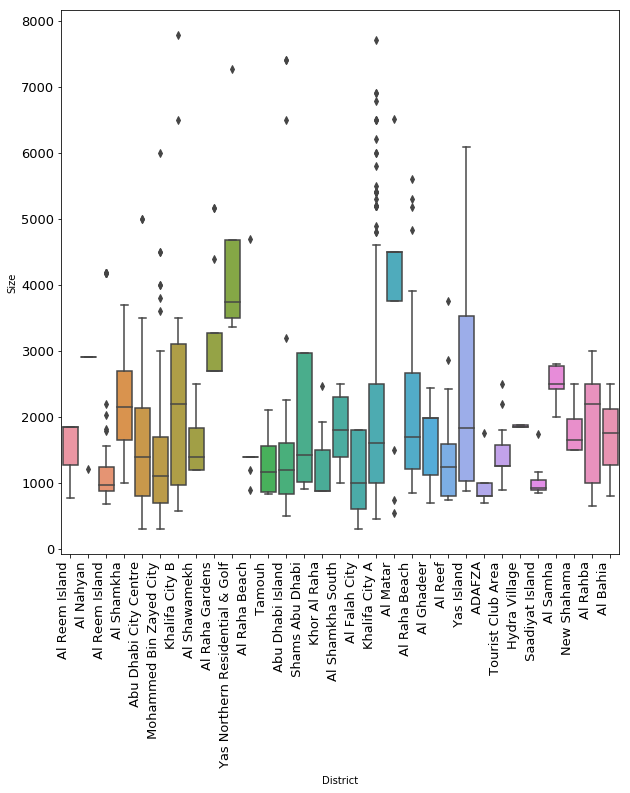

In [436]:
plt.figure(figsize=(10,10))
ax=sns.boxplot(x='District', y='Size', data=rental_properties_df_new)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
ax.tick_params(labelsize=13)

### 5. Get Foursquare data

In [437]:


CLIENT_ID = 'TYMN3CEHGGSFPQVFFINE2DZIBP5FOM1NUTWTN1J3U5ITGGCF' # your Foursquare ID
CLIENT_SECRET = '2YIBTV3F001GZNR5X1KS2KGX0ZG5JAUQMFEDCXW15C3ICJ3S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius


In [438]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [439]:
AbuDhabi_venues = getNearbyVenues(names=abuDhabi_districts['District'],
                                   latitudes=abuDhabi_districts['latitude'],
                                   longitudes=abuDhabi_districts['longitude'],
                                   radius=2000, LIMIT=100)

In [440]:
AbuDhabi_venues.head()

District  District Latitude  District Longitude  \
0  Al Reem Island           24.49232            54.40433   
1  Al Reem Island           24.49232            54.40433   
2  Al Reem Island           24.49232            54.40433   
3  Al Reem Island           24.49232            54.40433   
4  Al Reem Island           24.49232            54.40433   

                        Venue  Venue Latitude  Venue Longitude  \
0                   Starbucks       24.495843        54.408032   
1         Waitrose & Partners       24.495135        54.407199   
2  First Clique Marina Square       24.491288        54.393438   
3        Al Reem Central Park       24.504715        54.407584   
4                    Wingzone       24.496337        54.407435   

         Venue Category  
0           Coffee Shop  
1         Grocery Store  
2                  Café  
3                  Park  
4  Fast Food Restaurant

In [441]:
print('{} venues are collected'.format(AbuDhabi_venues.shape[0]))

1429 venues are collected


### Show venues in Abu Dhabi

In [442]:
# create map of Abu Dhabi using latitude and longitude values
map_AbuDhabi_venues = folium.Map(location=[24.46667, 54.36667], zoom_start=10)

# add markers to map
for lat, lng, district, venue in zip(AbuDhabi_venues['Venue Latitude'], AbuDhabi_venues['Venue Longitude'], AbuDhabi_venues['District'], AbuDhabi_venues['Venue']):
    dist = district
    label = '{}. {}'.format(dist, venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_AbuDhabi_venues)  
    
map_AbuDhabi_venues

In [443]:
AbuDhabi_venues.groupby('District').count()

District Latitude  District Longitude  \
District                                                                  
 ADAFZA                                         100                 100   
 Abu Dhabi City Centre                           86                  86   
 Abu Dhabi Island                                68                  68   
 Al Ghadeer                                       3                   3   
 Al Matar                                        82                  82   
 Al Nahyan                                       96                  96   
 Al Raha Beach                                   22                  22   
 Al Reef                                          9                   9   
 Al Reem Island                                  55                  55   
 Khor Al Raha                                    85                  85   
 Mohammed Bin Zayed City                          4                   4   
 Saadiyat Island                                 31                  31   
 Shams Abu Dhabi                                100                 100   
 Tamouh                                         100                 100   
 Tourist Club Area                              100                 100   
 Yas Island                                     100                 100   
 Yas Northern Residential & Golf                100                 100   
Al Bahia                                          8                   8   
Al Falah City                                     4                   4   
Al Raha Beach                                    22                  22   
Al Raha Gardens                                  33                  33   
Al Rahba                                          6                   6   
Al Reem Island                                   55                  55   
Al Samha                                         18                  18   
Al Shamkha                                        5                   5   
Al Shamkha South                                  1                   1   
Al Shawamekh                                      6                   6   
Hydra Village                                    18                  18   
Khalifa City A                                   43                  43   
Khalifa City B                                   43                  43   
New Shahama                                      26                  26   

                                  Venue  Venue Latitude  Venue Longitude  \
District                                                                   
 ADAFZA                             100             100              100   
 Abu Dhabi City Centre               86              86               86   
 Abu Dhabi Island                    68              68               68   
 Al Ghadeer                           3               3                3   
 Al Matar                            82              82               82   
 Al Nahyan                           96              96               96   
 Al Raha Beach                       22              22               22   
 Al Reef                              9               9                9   
 Al Reem Island                      55              55               55   
 Khor Al Raha                        85              85               85   
 Mohammed Bin Zayed City              4               4                4   
 Saadiyat Island                     31              31               31   
 Shams Abu Dhabi                    100             100              100   
 Tamouh                             100             100              100   
 Tourist Club Area                  100             100              100   
 Yas Island                         100             100              100   
 Yas Northern Residential & Golf    100             100              100   
Al Bahia                              8               8                8   
Al Falah City                         

#### Let's find out how many unique categories can be curated from all the returned venues

In [444]:
print('There are {} uniques categories.'.format(len(AbuDhabi_venues['Venue Category'].unique())))

There are 173 uniques categories.


#### 6. Analyze Each District

In [445]:
# one hot encoding
abuDhabi_onehot = pd.get_dummies(AbuDhabi_venues[['Venue Category']], prefix="", prefix_sep="")
abuDhabi_onehot.head()

Afghan Restaurant  African Restaurant  Airport  American Restaurant  \
0                  0                   0        0                    0   
1                  0                   0        0                    0   
2                  0                   0        0                    0   
3                  0                   0        0                    0   
4                  0                   0        0                    0   

   Arcade  Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0       0                 0                   0                      0   
1       0                 0                   0                      0   
2       0                 0                   0                      0   
3       0                 0                   0                      0   
4       0                 0                   0                      0   

   Auto Workshop  BBQ Joint  ...  Train Station  Tunnel  Turkish Restaurant  \
0              0          0  ...              0       0                   0   
1              0          0  ...              0       0                   0   
2              0          0  ...              0       0                   0   
3              0          0  ...              0       0                   0   
4              0          0  ...              0       0                   0   

   Vietnamese Restaurant  Water Park  Wine Bar  Wine Shop  Women's Store  \
0                      0           0         0          0              0   
1                      0           0         0          0              0   
2                      0           0         0          0              0   
3                      0           0         0          0              0   
4                      0           0         0          0              0   

   Yemeni Restaurant  Yoga Studio  
0                  0            0  
1                  0            0  
2                  0            0  
3                  0            0  
4                  0            0  

[5 rows x 173 columns]

In [446]:

# add neighborhood column back to dataframe
abuDhabi_onehot['District'] = AbuDhabi_venues['District'] 
abuDhabi_onehot.head()
# move neighborhood column to the first column
fixed_columns = [abuDhabi_onehot.columns[-1]] + list(abuDhabi_onehot.columns[:-1])
abuDhabi_onehot = abuDhabi_onehot[fixed_columns]

abuDhabi_onehot.head()

District  Afghan Restaurant  African Restaurant  Airport  \
0  Al Reem Island                  0                   0        0   
1  Al Reem Island                  0                   0        0   
2  Al Reem Island                  0                   0        0   
3  Al Reem Island                  0                   0        0   
4  Al Reem Island                  0                   0        0   

   American Restaurant  Arcade  Asian Restaurant  Athletics & Sports  \
0                    0       0                 0                   0   
1                    0       0                 0                   0   
2                    0       0                 0                   0   
3                    0       0                 0                   0   
4                    0       0                 0                   0   

   Australian Restaurant  Auto Workshop  ...  Train Station  Tunnel  \
0                      0              0  ...              0       0   
1                      0              0  ...              0       0   
2                      0              0  ...              0       0   
3                      0              0  ...              0       0   
4                      0              0  ...              0       0   

   Turkish Restaurant  Vietnamese Restaurant  Water Park  Wine Bar  Wine Shop  \
0                   0                      0           0         0          0   
1                   0                      0           0         0          0   
2                   0                      0           0         0          0   
3                   0                      0           0         0          0   
4                   0                      0           0         0          0   

   Women's Store  Yemeni Restaurant  Yoga Studio  
0              0                  0            0  
1              0                  0            0  
2              0                  0            0  
3              0                  0            0  
4              0                  0            0  

[5 rows x 174 columns]

#### Next, let's group rows by district and by taking the mean of the frequency of occurrence of each category

In [447]:
abuDhabi_grouped = abuDhabi_onehot.groupby('District').mean().reset_index()
abuDhabi_grouped

District  Afghan Restaurant  African Restaurant  \
0                             ADAFZA           0.000000                0.00   
1              Abu Dhabi City Centre           0.000000                0.00   
2                   Abu Dhabi Island           0.000000                0.00   
3                         Al Ghadeer           0.000000                0.00   
4                           Al Matar           0.000000                0.00   
5                          Al Nahyan           0.000000                0.00   
6                      Al Raha Beach           0.000000                0.00   
7                            Al Reef           0.000000                0.00   
8                     Al Reem Island           0.018182                0.00   
9                       Khor Al Raha           0.000000                0.00   
10           Mohammed Bin Zayed City           0.000000                0.00   
11                   Saadiyat Island           0.000000                0.00   
12                   Shams Abu Dhabi           0.010000                0.00   
13                            Tamouh           0.010000                0.01   
14                 Tourist Club Area           0.010000                0.00   
15                        Yas Island           0.000000                0.00   
16   Yas Northern Residential & Golf           0.000000                0.00   
17                          Al Bahia           0.000000                0.00   
18                     Al Falah City           0.000000                0.00   
19                     Al Raha Beach           0.000000                0.00   
20                   Al Raha Gardens           0.000000                0.00   
21                          Al Rahba           0.000000                0.00   
22                    Al Reem Island           0.018182                0.00   
23                          Al Samha           0.000000                0.00   
24                        Al Shamkha           0.000000                0.00   
25                  Al Shamkha South           0.000000                0.00   
26                      Al Shawamekh           0.000000                0.00   
27                     Hydra Village           0.000000                0.00   
28                    Khalifa City A           0.000000                0.00   
29                    Khalifa City B           0.000000                0.00   
30                       New Shahama           0.000000                0.00   

     Airport  American Restaurant  Arcade  Asian Restaurant  \
0   0.000000             0.000000    0.00          0.010000   
1   0.000000             0.011628    0.00          0.000000   
2   0.000000             0.058824    0.00          0.029412   
3   0.000000             0.000000    0.00          0.000000   
4   0.012195             0.000000    0.00          0.000000   
5   0.000000             0.000000    0.00          0.000000   
6   0.000000             0.045455    0.00          0.000000   
7   0.000000             0.000000    0.00          0.000000   
8   0.000000             0.018182    0.00          0.018182   
9   0.000000             0.000000    0.00          0.000000   
10  0.000000             0.000000    0.00          0.000000   
11  0.000000             0.000000    0.00          0.000000   
12  0.000000             0.010000    0.00          0.020000   
13  0.000000             0.020000    0.00          0.010000   
14  0.000000             0.020000    0.00          0.020000   
15  0.000000             0.020000    0.01          0.000000   
16  0.000000             0.000000    0.00          0.010000   
17  0.000000             0.000000    0.00          0.000000   
18  0.000000             0.000000    0.00          0.000000   
19  0.000000             0.045455    0.00          0.000000   
20  0.000000             0.000000    0.00          0.030303   
21  0.000000             0.000000    0.00          0.000000   
22  0.000000             0.018182    0.00         

In [448]:
abuDhabi_grouped['sum'] = abuDhabi_grouped.sum(axis=1, numeric_only=True)
abuDhabi_grouped
list(abuDhabi_grouped.columns) 


['District',
 'Afghan Restaurant',
 'African Restaurant',
 'Airport',
 'American Restaurant',
 'Arcade',
 'Asian Restaurant',
 'Athletics & Sports',
 'Australian Restaurant',
 'Auto Workshop',
 'BBQ Joint',
 'Bagel Shop',
 'Bakery',
 'Bar',
 'Basketball Court',
 'Beach',
 'Beach Bar',
 'Bed & Breakfast',
 'Bistro',
 'Bookstore',
 'Border Crossing',
 'Boutique',
 'Bowling Alley',
 'Breakfast Spot',
 'Brewery',
 'Bubble Tea Shop',
 'Buffet',
 'Burger Joint',
 'Burrito Place',
 'Cafeteria',
 'Café',
 'Campground',
 'Candy Store',
 'Chinese Restaurant',
 'Clothing Store',
 'Cocktail Bar',
 'Coffee Shop',
 'Concert Hall',
 'Convenience Store',
 'Cosmetics Shop',
 'Cupcake Shop',
 'Department Store',
 'Dessert Shop',
 'Diner',
 'Donut Shop',
 'Egyptian Restaurant',
 'Electronics Store',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Farm',
 'Farmers Market',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'Fish & Chips Shop',
 'Fish Market',
 'Flower Shop',
 'Food',
 'Food & Drink Shop'

#### First, let's write a function to sort the venues in descending order.

In [449]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Now let's create a new dataframe and display the top 10 venues for each district.

In [450]:
num_top_venues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for idx in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(idx+1, indicators[idx]))
    except:
        columns.append('{}th Most Common Venue'.format(idx+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['District'] = abuDhabi_grouped['District']

for idx in np.arange(abuDhabi_grouped.shape[0]):
    district_venues_sorted.iloc[idx, 1:] = return_most_common_venues(abuDhabi_grouped.iloc[idx, :], num_top_venues)

In [451]:
district_venues_sorted 

District 1st Most Common Venue  \
0                             ADAFZA                   sum   
1              Abu Dhabi City Centre                   sum   
2                   Abu Dhabi Island                   sum   
3                         Al Ghadeer                   sum   
4                           Al Matar                   sum   
5                          Al Nahyan                   sum   
6                      Al Raha Beach                   sum   
7                            Al Reef                   sum   
8                     Al Reem Island                   sum   
9                       Khor Al Raha                   sum   
10           Mohammed Bin Zayed City                   sum   
11                   Saadiyat Island                   sum   
12                   Shams Abu Dhabi                   sum   
13                            Tamouh                   sum   
14                 Tourist Club Area                   sum   
15                        Yas Island                   sum   
16   Yas Northern Residential & Golf                   sum   
17                          Al Bahia                   sum   
18                     Al Falah City                   sum   
19                     Al Raha Beach                   sum   
20                   Al Raha Gardens                   sum   
21                          Al Rahba                   sum   
22                    Al Reem Island                   sum   
23                          Al Samha                   sum   
24                        Al Shamkha                   sum   
25                  Al Shamkha South                   sum   
26                      Al Shawamekh                   sum   
27                     Hydra Village                   sum   
28                    Khalifa City A                   sum   
29                    Khalifa City B                   sum   
30                       New Shahama                   sum   

           2nd Most Common Venue      3rd Most Common Venue  \
0                           Café  Middle Eastern Restaurant   
1                           Café                Coffee Shop   
2                    Coffee Shop                       Café   
3                 Ice Cream Shop                 Taco Place   
4                           Café                      Hotel   
5                           Café                Coffee Shop   
6                            Spa                       Café   
7                           Pool             Gymnastics Gym   
8                           Café                Coffee Shop   
9                    Coffee Shop  Middle Eastern Restaurant   
10                  Burger Joint                Coffee Shop   
11                         Beach                      Hotel   
12                         Hotel                       Café   
13                          Café  Middle Eastern Restaurant   
14                         Hotel                       Café   
15  Theme Park Ride / Attraction                  Racetrack   
16                          Café  Middle Eastern Restaurant   
17                 Grocery Store                      Beach   
18                   Supermarket    North Indian Restaurant   
19                           Spa                       Café   
20                Sandwich Place                       Café   
21                Breakfast Spot                       Park   
22                          Café                Coffee Shop   
23          Fast Food Restaurant                Pizza Place   
24                Ice Cream Shop    North Indian Restaurant   
25                     Beach Bar              Garden Center   
26                        Market                Coffee Shop   
27                   Coffee Shop               Burger Joint   
28                           Spa                Pizza Place   
29                           Spa                Pizza Place   
30                          Café               Burger Joint   

        4th Most Common Ve

## 7. Cluster Districts

In [452]:
# set number of clusters
kclusters = 2

abuDhabi_grouped_clustering = abuDhabi_grouped.drop('District', 1)
abuDhabi_grouped_clustering.reset_index()
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(abuDhabi_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0])

In [453]:
abuDhabi_grouped_clustering

Afghan Restaurant  African Restaurant   Airport  American Restaurant  \
0            0.000000                0.00  0.000000             0.000000   
1            0.000000                0.00  0.000000             0.011628   
2            0.000000                0.00  0.000000             0.058824   
3            0.000000                0.00  0.000000             0.000000   
4            0.000000                0.00  0.012195             0.000000   
5            0.000000                0.00  0.000000             0.000000   
6            0.000000                0.00  0.000000             0.045455   
7            0.000000                0.00  0.000000             0.000000   
8            0.018182                0.00  0.000000             0.018182   
9            0.000000                0.00  0.000000             0.000000   
10           0.000000                0.00  0.000000             0.000000   
11           0.000000                0.00  0.000000             0.000000   
12           0.010000                0.00  0.000000             0.010000   
13           0.010000                0.01  0.000000             0.020000   
14           0.010000                0.00  0.000000             0.020000   
15           0.000000                0.00  0.000000             0.020000   
16           0.000000                0.00  0.000000             0.000000   
17           0.000000                0.00  0.000000             0.000000   
18           0.000000                0.00  0.000000             0.000000   
19           0.000000                0.00  0.000000             0.045455   
20           0.000000                0.00  0.000000             0.000000   
21           0.000000                0.00  0.000000             0.000000   
22           0.018182                0.00  0.000000             0.018182   
23           0.000000                0.00  0.000000             0.000000   
24           0.000000                0.00  0.000000             0.000000   
25           0.000000                0.00  0.000000             0.000000   
26           0.000000                0.00  0.000000             0.000000   
27           0.000000                0.00  0.000000             0.000000   
28           0.000000                0.00  0.000000             0.000000   
29           0.000000                0.00  0.000000             0.000000   
30           0.000000                0.00  0.000000             0.038462   

    Arcade  Asian Restaurant  Athletics & Sports  Australian Restaurant  \
0     0.00          0.010000            0.000000               0.010000   
1     0.00          0.000000            0.011628               0.011628   
2     0.00          0.029412            0.000000               0.000000   
3     0.00          0.000000            0.000000               0.000000   
4     0.00          0.000000            0.000000               0.000000   
5     0.00          0.000000            0.010417               0.010417   
6     0.00          0.000000            0.045455               0.000000   
7     0.00          0.000000            0.000000               0.000000   
8     0.00          0.018182            0.000000               0.000000   
9     0.00          0.000000            0.000000               0.000000   
10    0.00          0.000000            0.000000               0.000000   
11    0.00          0.000000            0.032258               0.000000   
12    0.00          0.020000            0.000000               0.000000   
13    0.00          0.010000            0.000000               0.000000   
14    0.00          0.020000            0.000000               0.000000   
15    0.01          0.000000            0.030000               0.000000   
16    0.00          0.010000            0.000000               0.010000   
17    0.00          0.000000            0.000000               0.000000   
18    0.00          0.000000            0.000000               0.000000   
19    0.00          0.000000            0.045455               0.000000

In [454]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)



In [455]:
# add price/sqft for each district
abudhabi_merged = pd.merge(abuDhabi_districts, mean_per_district[['District', 'Price/sqft']])

# add latitude/longitude for each district
abudhabi_merged = abudhabi_merged.join(district_venues_sorted.set_index('District'), on='District')
abudhabi_merged.head()


PostalCode          District latitude longitude  Latitude  Longitude  \
0  Abu Dhabi    Al Reem Island  24.4923   54.4043  54.32175  24.476312   
1  Abu Dhabi       New Shahama  24.5253   54.6766  54.32175  24.476312   
2  Abu Dhabi          Al Samha  24.6646   54.7661  54.32175  24.476312   
3  Abu Dhabi   Saadiyat Island  24.5438   54.4492  54.32175  24.476312   
4  Abu Dhabi     Hydra Village  24.5493   54.6958  54.32175  24.476312   

   Price/sqft  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0   57.483500               0                   sum                  Café   
1   26.367500               0                   sum                  Café   
2   24.641429               0                   sum  Fast Food Restaurant   
3   69.050000               0                   sum                 Beach   
4   34.248333               0                   sum           Coffee Shop   

   ...    11th Most Common Venue 12th Most Common Venue  \
0  ...  Mediterranean Restaurant     Mexican Restaurant   
1  ...      Gym / Fitness Center      Indian Restaurant   
2  ...             Train Station    Fried Chicken Joint   
3  ...             Burrito Place         Breakfast Spot   
4  ...                 Cafeteria          Moving Target   

     13th Most Common Venue     14th Most Common Venue 15th Most Common Venue  \
0          Pedestrian Plaza                       Park    Japanese Restaurant   
1                 Juice Bar  Middle Eastern Restaurant          Movie Theater   
2                Food Truck                 Water Park      Food & Drink Shop   
3  Mediterranean Restaurant                Golf Course             Steakhouse   
4            Breakfast Spot       Gym / Fitness Center                    Gym   

  16th Most Common Venue 17th Most Common Venue  \
0            Pizza Place                  Plaza   
1                   Park     Italian Restaurant   
2                   Food            Flower Shop   
3                    Gym     Athletics & Sports   
4             Food Truck             Food Court   

                     18th Most Common Venue 19th Most Common Venue  \
0  Residential Building (Apartment / Condo)                 Resort   
1                        Turkish Restaurant                Theater   
2                               Fish Market      Fish & Chips Shop   
3                                Hotel Pool                   Pool   
4                         Food & Drink Shop                   Food   

  20th Most Common Venue  
0             Restaurant  
1                   Farm  
2    Filipino Restaurant  
3                 Lounge  
4                  Hotel  

[5 rows x 28 columns]

In [456]:
abudhabi_merged['Cluster Labels'].value_counts()


0    30
1     1
Name: Cluster Labels, dtype: int64

In [457]:
# create map
map_clusters = folium.Map(location=[24.46667, 54.36667], zoom_start=12)

# set colors
rainbow = ['blue', 'red','green','orange']

# add markers to the map
markers_colors = []
for district,lat, lon, poi, cluster in zip(abudhabi_merged['District'], abudhabi_merged['longitude'],abudhabi_merged['latitude'], abudhabi_merged['District'], abudhabi_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lon, lat],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 8. Examine Clusters

#### Cluster 1

In [458]:
cluster1 = abudhabi_merged.loc[abudhabi_merged['Cluster Labels'] == 0, abudhabi_merged.columns[[1] + list(range(5, abudhabi_merged.shape[1]))]]
cluster1

District  Longitude  Price/sqft  Cluster Labels  \
0                     Al Reem Island  24.476312   57.483500               0   
1                        New Shahama  24.476312   26.367500               0   
2                           Al Samha  24.476312   24.641429               0   
3                    Saadiyat Island  24.476312   69.050000               0   
4                      Hydra Village  24.476312   34.248333               0   
5                  Tourist Club Area  24.476312   45.945714               0   
6                             ADAFZA  24.476312   57.358000               0   
7                         Yas Island  24.476312   70.760000               0   
8                            Al Reef  24.476312   54.608462               0   
9                         Al Ghadeer  24.476312   46.150000               0   
10                     Al Raha Beach  24.476312   72.326250               0   
11                          Al Matar  24.476312   44.687500               0   
12                    Khalifa City A  24.476312   38.077529               0   
13                     Al Falah City  24.476312   47.846000               0   
14                          Al Rahba  24.476312   27.524615               0   
16                   Shams Abu Dhabi  24.476312   73.047143               0   
17                  Abu Dhabi Island  24.476312   48.949286               0   
18                            Tamouh  24.476312   67.080000               0   
19                     Al Raha Beach  24.476312   88.751818               0   
20   Yas Northern Residential & Golf  24.476312   46.465676               0   
21                   Al Raha Gardens  24.476312   48.176667               0   
22                      Al Shawamekh  24.476312   26.155000               0   
23                    Khalifa City B  24.476312   38.761333               0   
24           Mohammed Bin Zayed City  24.476312   40.110000               0   
25             Abu Dhabi City Centre  24.476312   62.521739               0   
26                        Al Shamkha  24.476312   24.395938               0   
27                    Al Reem Island  24.476312   63.490370               0   
28                         Al Nahyan  24.476312   47.097692               0   
29                      Khor Al Raha  24.476312   83.327222               0   
30                          Al Bahia  24.476312   36.657500               0   

   1st Most Common Venue         2nd Most Common Venue  \
0                    sum                          Café   
1                    sum                          Café   
2                    sum          Fast Food Restaurant   
3                    sum                         Beach   
4                    sum                   Coffee Shop   
5                    sum                         Hotel   
6                    sum                          Café   
7                    sum  Theme Park Ride / Attraction   
8                    sum                          Pool   
9                    sum                Ice Cream Shop   
10                   sum                           Spa   
11                   sum                          Café   
12                   sum                           Spa   
13                   sum                   Supermarket   
14                   sum                Breakfast Spot   
16                   sum                         Hotel   
17                   sum                   Coffee Shop   
18                   sum                          Café   
19                   sum                           Spa   
20                   sum                          Café   
21                   sum                Sandwich Place   
22                   sum                        Market   
23                   sum                           Spa   
24                   sum                  Burger Joint   
25                   sum                          Café   
26                   sum                Ice Cream Shop   
27          

#### Cluster 2

In [459]:
cluster2 = abudhabi_merged.loc[abudhabi_merged['Cluster Labels'] == 1, abudhabi_merged.columns[[1] + list(range(5, abudhabi_merged.shape[1]))]]
cluster2

District  Longitude  Price/sqft  Cluster Labels  \
15  Al Shamkha South  24.476312      25.532               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
15                   sum             Beach Bar         Garden Center   

     4th Most Common Venue    5th Most Common Venue 6th Most Common Venue  \
15  Furniture / Home Store  Fruit & Vegetable Store   Fried Chicken Joint   

    ... 11th Most Common Venue 12th Most Common Venue 13th Most Common Venue  \
15  ...                   Food            Flower Shop            Fish Market   

   14th Most Common Venue 15th Most Common Venue 16th Most Common Venue  \
15      Fish & Chips Shop    Filipino Restaurant   Fast Food Restaurant   

   17th Most Common Venue 18th Most Common Venue 19th Most Common Venue  \
15         Farmers Market                   Farm     Falafel Restaurant   

   20th Most Common Venue  
15   Ethiopian Restaurant  

[1 rows x 24 columns]